In [1]:
import os
import pickle
import numpy as np
import tensorflow.keras as keras
data_dir = "prepped_data/train_set/"

In [2]:
names = os.listdir(data_dir)


In [3]:
classes.shape

NameError: name 'classes' is not defined

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(128, 128, 4)
                 
                ))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))              
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(12))

model.summary()

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=Adam(lr=.001))




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      1184      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 128)      

In [17]:
name = names[0]

def load_dataset(name):
    with open(name, "rb") as f:
        dataset = pickle.load(f)

    data = []
    classes = []
    for elem in dataset:
        data_entry = np.array(np.stack(elem["data"], axis=-1), dtype=np.float32)
        data_entry += 1000
        data_entry /= 2000
        data.append(data_entry)

        class_entry = elem["classes"]
        class_entry = np.concatenate([class_entry[0] / 4, class_entry[1].flatten() * 40])
        class_entry[[3, 7, 11]] -= 40
        classes.append(class_entry)
    data = np.array(data)
    classes = np.array(classes)
    return data, classes


In [19]:
tdata, tclasses = load_dataset("prepped_data/test_set/Pancreas_6pregenerated.pickle")

for _ in range(20):
    print("===========")
    for name in names:
        data, classes = load_dataset(data_dir + name)
        loss_curve = model.fit(data, 
              classes,
              batch_size=100,
              epochs=1,
              verbose=1,
              validation_data=(tdata[:256], tclasses[:256]))

Train on 2048 samples, validate on 256 samples


ResourceExhaustedError: OOM when allocating tensor with shape[100,32,126,126] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node Adam_2/gradients/max_pooling2d_6/MaxPool_grad/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [15]:
rclasses = model.predict(tdata)

In [9]:
rclasses[0]

array([ 1.1711868 ,  0.03249744,  0.33013546, -0.01863213, -0.17006135,
       -0.02528169,  0.16868189, -0.01750384, -0.04328967,  0.02035229,
        0.04909066, -0.0088096 ], dtype=float32)

In [10]:
tclasses[0]

array([ 0.69142932, -1.63635466,  0.20688781, -0.03108937, -1.21652409,
       -1.00312126,  1.20682899, -0.02020552, -0.39949599,  1.01476445,
        0.36892059, -0.01457577])

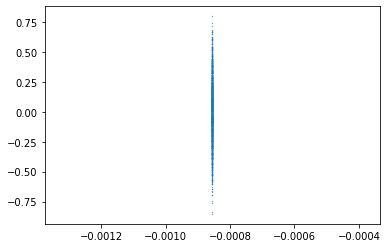

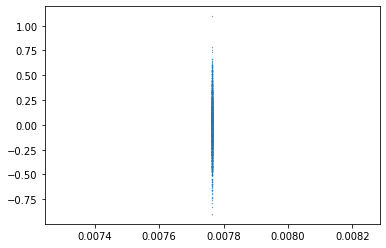

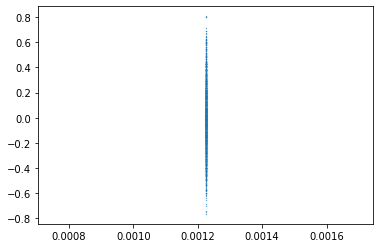

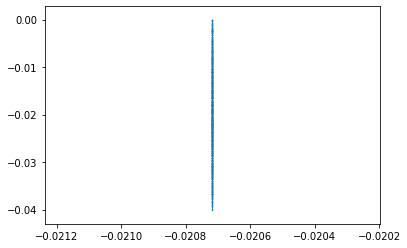

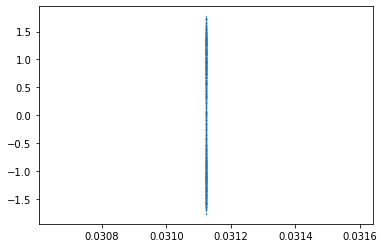

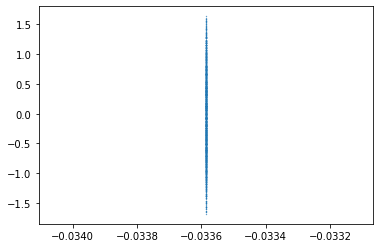

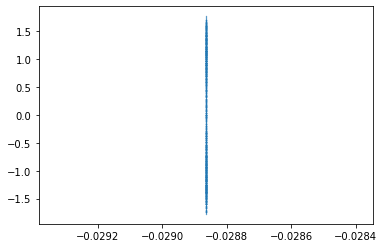

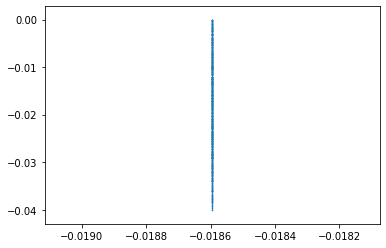

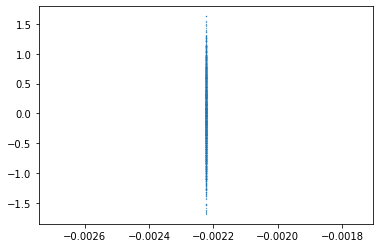

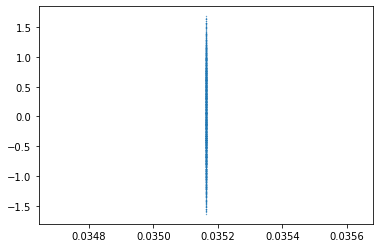

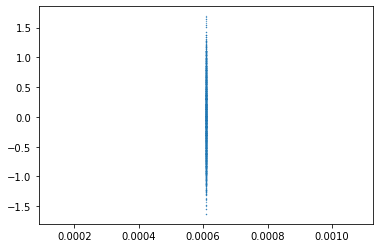

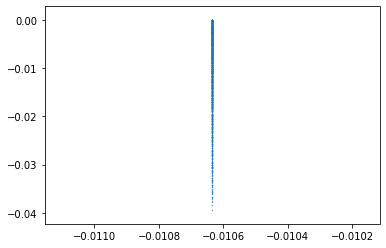

In [16]:
import matplotlib.pyplot as plt
for j in range(12):
    plt.scatter(rclasses[:, j], tclasses[:, j], s=.1)
    plt.show()

In [86]:
#model.save("naive_network_weights")

In [3]:
import matplotlib

In [4]:
plt.scatter?

Object `plt.scatter` not found.
